In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [12]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [14]:
y=pd.DataFrame(target)

In [15]:
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [16]:
y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [17]:
x=pd.DataFrame(data)

In [18]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
xtrain,xtest,ytrain,ytest

(           0     1      2    3      4      5     6       7     8      9   \
 220   0.35809   0.0   6.20  1.0  0.507  6.951  88.5  2.8617   8.0  307.0   
 71    0.15876   0.0  10.81  0.0  0.413  5.961  17.5  5.2873   4.0  305.0   
 240   0.11329  30.0   4.93  0.0  0.428  6.897  54.3  6.3361   6.0  300.0   
 6     0.08829  12.5   7.87  0.0  0.524  6.012  66.6  5.5605   5.0  311.0   
 417  25.94060   0.0  18.10  0.0  0.679  5.304  89.1  1.6475  24.0  666.0   
 ..        ...   ...    ...  ...    ...    ...   ...     ...   ...    ...   
 323   0.28392   0.0   7.38  0.0  0.493  5.708  74.3  4.7211   5.0  287.0   
 192   0.08664  45.0   3.44  0.0  0.437  7.178  26.3  6.4798   5.0  398.0   
 117   0.15098   0.0  10.01  0.0  0.547  6.021  82.6  2.7474   6.0  432.0   
 47    0.22927   0.0   6.91  0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
 172   0.13914   0.0   4.05  0.0  0.510  5.572  88.5  2.5961   5.0  296.0   
 
        10      11     12  
 220  17.4  391.70   9.71  
 71   19.2  376.94

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [26]:
ytrain_predict=lm.predict(xtrain)
ytest_predict=lm.predict(xtest)
pd.DataFrame(ytrain_predict)

,0
0,32.556927
1,21.927095
2,27.543826
3,23.603188
4,6.571910
...,...
399,19.494951
400,33.326364
401,23.796208
402,18.458353


In [27]:
df=pd.DataFrame(ytrain)
df=pd.DataFrame(ytest)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
MSE=mean_squared_error(ytest,ytest_predict)
print("Test:",MSE)
MSE=mean_squared_error(ytrain_predict,ytrain)
print("Train:",MSE)
r1=r2_score(ytrain_predict,ytrain)
print("Training R_Score:",(r1*100)//1,"%")
r1=r2_score(ytest,ytest_predict)
print("Testing R_Score:",(r1*100)//1,"%")

Test: 33.448979997676304
Train: 19.326470203585725
Training R_Score: 70.0 %
Testing R_Score: 58.0 %


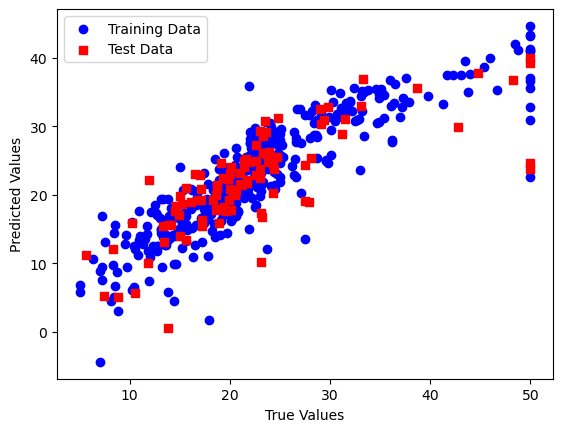

In [37]:
plt.scatter(ytrain,ytrain_predict,c='blue',marker='o',label='Training Data')
plt.scatter(ytest,ytest_predict,c='red',marker='s',label='Test Data')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')
plt.plot()
plt.show()